Resampling audio from 48000Hz to 16000Hz
Threshold used: 0.01
Number of numbers detected: 13
Maximum amplitude: 0.8498981743218798
[0 0 0 ... 0 0 0]


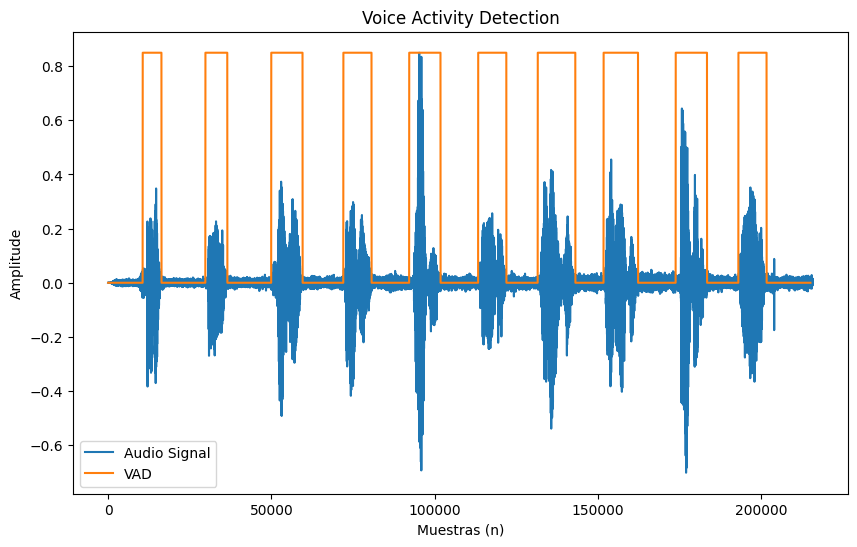

Resampling audio from 48000Hz to 16000Hz
Threshold used: 0.035
Number of numbers detected: 10
Maximum amplitude: 0.30226033258531526
[0 0 0 ... 0 0 0]


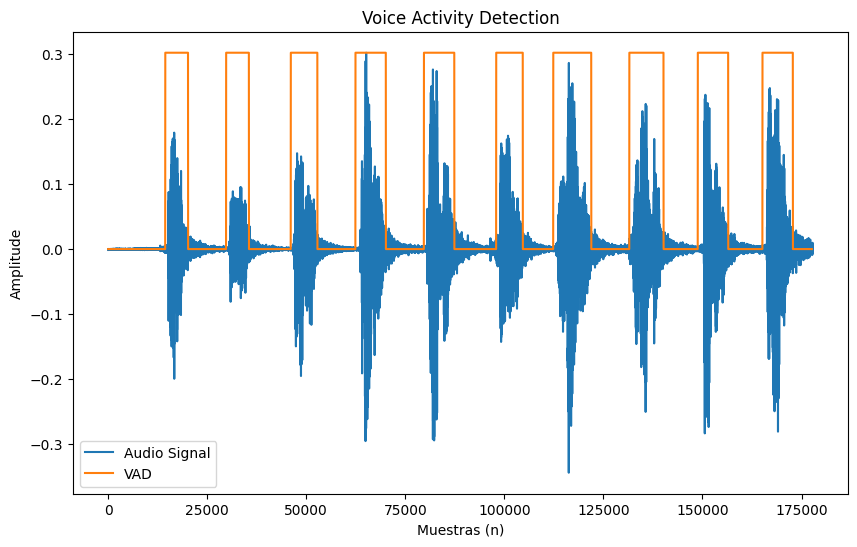

Resampling audio from 48000Hz to 16000Hz
Threshold used: 0.01
Number of numbers detected: 15
Maximum amplitude: 0.8718688724202243
[0 0 0 ... 0 0 0]


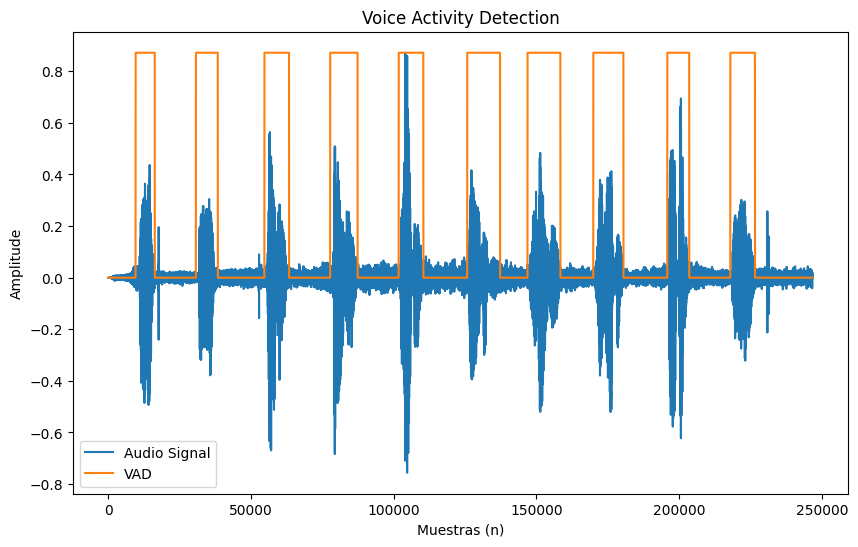

Resampling audio from 48000Hz to 16000Hz
Threshold used: 0.01
Number of numbers detected: 13
Maximum amplitude: 0.7238415830558381
[0 0 0 ... 0 0 0]


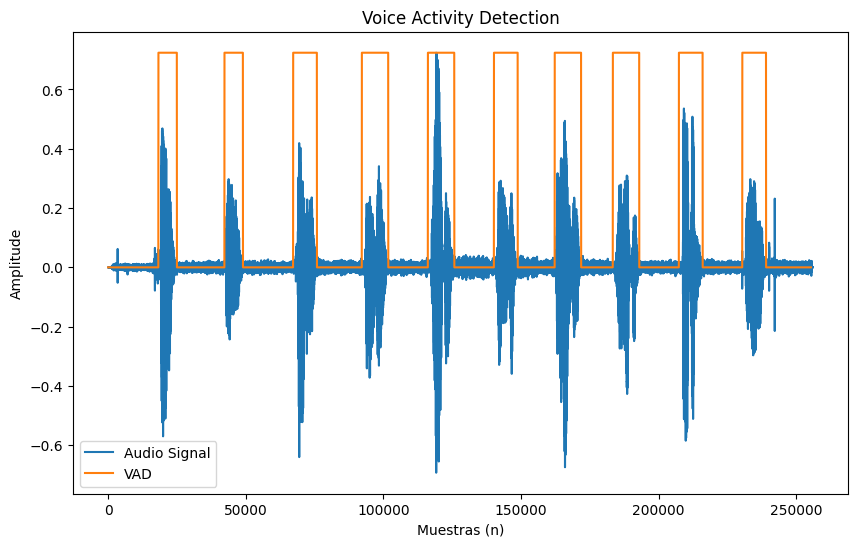

Resampling audio from 48000Hz to 16000Hz
Threshold used: 0.02
Number of numbers detected: 14
Maximum amplitude: 0.39110500186200226
[0 0 0 ... 0 0 0]


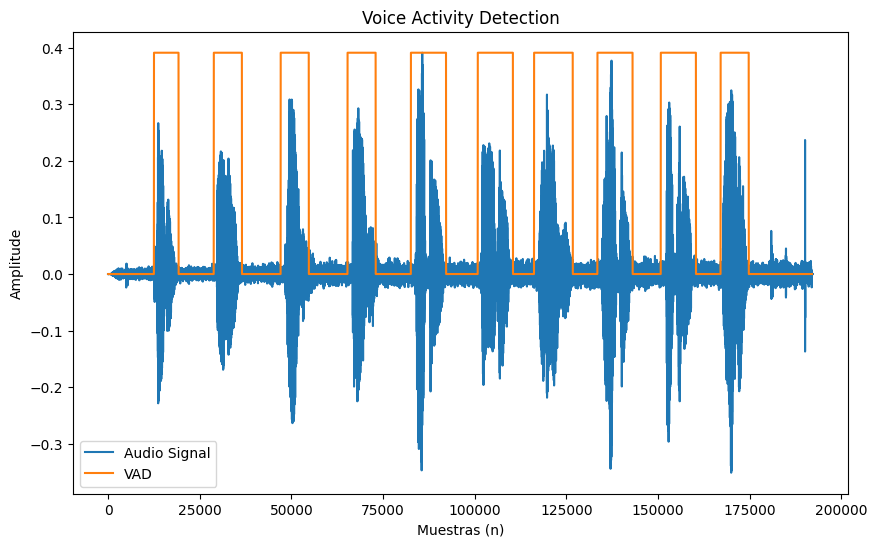

Resampling audio from 48000Hz to 16000Hz
Threshold used: 0.03
Number of numbers detected: 15
Maximum amplitude: 0.36327372828475313
[0 0 0 ... 0 0 0]


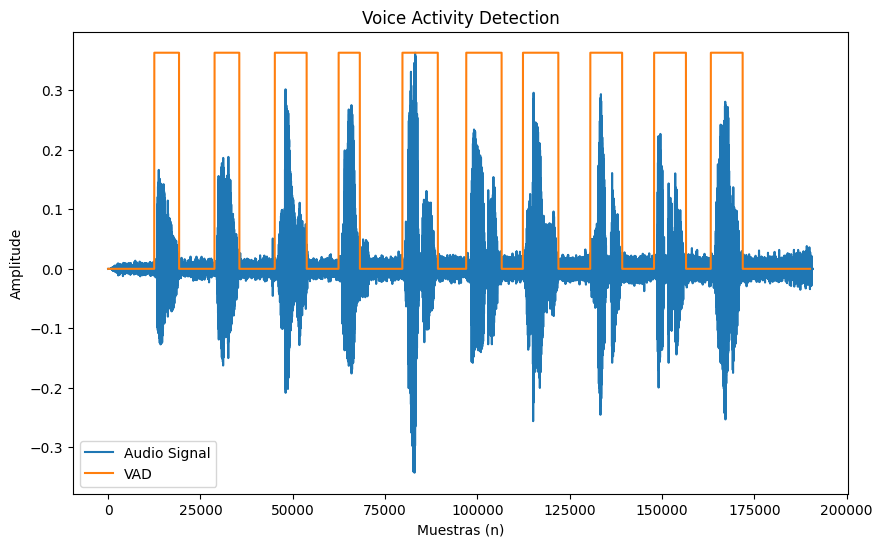

Resampling audio from 48000Hz to 16000Hz
Threshold used: 0.05
Number of numbers detected: 18
Maximum amplitude: 0.3297147800808389
[0 0 0 ... 0 0 0]


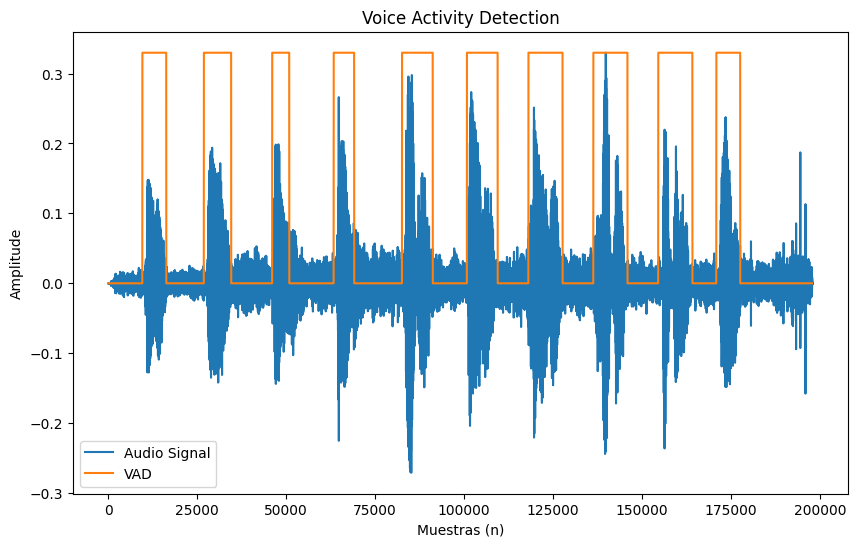

Resampling audio from 48000Hz to 16000Hz
Threshold used: 0.02
Number of numbers detected: 13
Maximum amplitude: 0.2795262727606655
[0 0 0 ... 0 0 0]


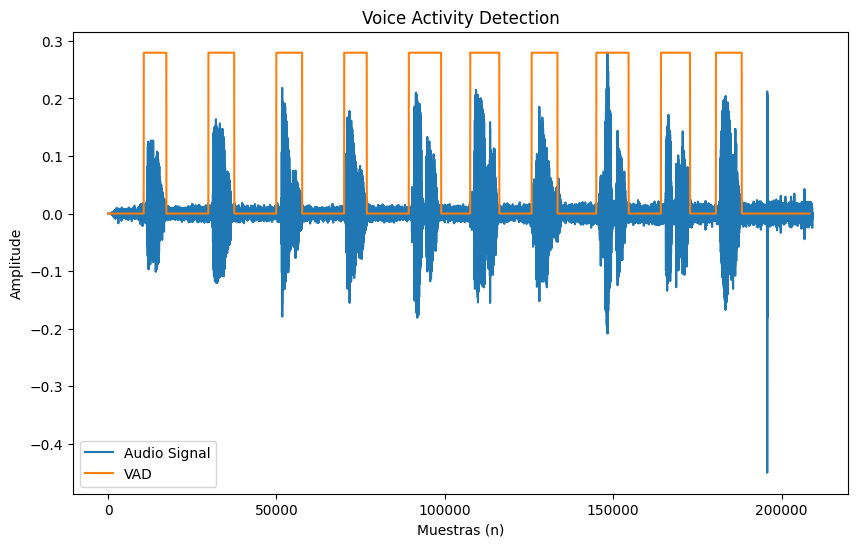

In [1]:
import sys
from matplotlib import pyplot as plt
import numpy as np
import sounddevice as sd
import scipy.signal as signal
import librosa

sys.path.append("/Users/carlosedm10/projects/college/TDS")

from utils import (
    continuous_time_plot,
    discrete_time_plot,
    number_count_detector,
    export_numbers,
    m4a_to_wav,
)

people = ("Carlos", "María")
for person in people:
    for audio in range(1, 5):
        m4a_path = f"/Users/carlosedm10/projects/college/TDS/P4/Original Audios/{person} {audio}.m4a"
        wav_path = f"/Users/carlosedm10/projects/college/TDS/P4/Original Audios/{person} {audio}.wav"
        audio_data, freq = m4a_to_wav(m4a_path, wav_path)

        # Time vector
        t = np.arange(0, len(audio_data) / freq, 1 / freq)

        # Plot the audio
        # continuous_time_plot(audio_data, variable_name="Audio")
        # discrete_time_plot(audio_data, variable_name="Audio")
        window_size = 0.02  # 32ms
        window_overlap = 0  # No overlap

        voice = number_count_detector(
            audio_data,
            freq,
            window_size,
            window_overlap,
            count=10,
        )
        print(voice)
        # Plot the VAD
        plt.figure(figsize=(10, 6))
        plt.plot(audio_data, label="Audio Signal")
        plt.plot(voice * np.max(audio_data), label="VAD")
        plt.xlabel("Muestras (n)")
        plt.ylabel("Amplitude")
        plt.legend()
        plt.title("Voice Activity Detection")
        plt.show()

        # Export the audios:
        export_numbers(
            audio_data,
            freq,
            voice,
            10,
            f"/Users/carlosedm10/projects/college/TDS/P4/Final Audios/{person}_{audio}_",
        )